In [1]:
import numpy as np
import pandas as pd
import scanpy as sc
import matplotlib.pyplot as plt
import seaborn as sns
import scanpy.external as sce
import gseapy

In [2]:
sc.settings.verbosity = 3             # verbosity: errors (0), warnings (1), info (2), hints (3)
sc.logging.print_versions()
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")


-----
anndata     0.7.5
scanpy      1.8.1
sinfo       0.3.1
-----
OpenSSL             20.0.1
PIL                 8.1.1
anndata             0.7.5
anyio               NA
appdirs             1.4.4
argon2              20.1.0
asciitree           NA
attr                20.3.0
babel               2.9.0
backcall            0.2.0
beta_ufunc          NA
binom_ufunc         NA
bioservices         1.7.11
boto3               1.20.24
botocore            1.23.24
brotli              NA
bs4                 4.9.3
bson                NA
cairo               1.20.0
certifi             2021.10.08
cffi                1.14.5
chardet             4.0.0
cloudpickle         1.3.0
colorama            0.4.4
colorlog            NA
cryptography        3.4.4
cycler              0.10.0
cython_runtime      NA
dask                2021.02.0
dateutil            2.8.1
decorator           4.4.2
docutils            0.16
easydev             0.11.0
fasteners           NA
future_fstrings     NA
google              NA
gridfs     

In [3]:
heart_infection_sc = sc.read_h5ad(filename="./../../../pyobjs_github/heart_infection_sc.h5ad")

In [4]:
endothelial = heart_infection_sc.raw.to_adata()[heart_infection_sc.obs["celltype_groups"].isin(["Endothelial cells"])]
endothelial

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


View of AnnData object with n_obs × n_vars = 11336 × 22757
    obs: 'sample', 'T1LReoS1', 'T1LReoS2', 'T1LReoS3', 'T1LReoS4', 'T1LReoM1', 'T1LReoM2', 'T1LReoM3', 'T1LReoL1', 'T1LReoL2', 'T1LReoL3', 'n_counts', 'n_genes_by_counts', 'total_counts', 'total_counts_mt', 'pct_counts_mt', 'total_viral', 'pct_viral', 'stage', 'state', 'condition', 'n_genes', 'S_score', 'G2M_score', 'phase', 'umap_density_condition', 'leiden_0.5', 'leiden_0.3', 'leiden_0.1', 'celltypes_leiden_0.3', 'celltypes_leiden_0.5', 'celltype_groups'
    var: 'gene_ids', 'feature_types', 'genome', 'n_cells', 'mt', 'n_cells_by_counts', 'mean_counts', 'pct_dropout_by_counts', 'total_counts', 'highly_variable', 'means', 'dispersions', 'dispersions_norm'
    uns: 'celltype_groups_colors', 'celltypes_leiden_0.5_colors', 'condition_colors', 'hvg', 'leiden', 'leiden_0.3_colors', 'leiden_0.5_colors', 'neighbors', 'pca', 'phase_colors', 'rank_genes_groups_celltypes_leiden_0.5', 'rank_genes_groups_leiden_0.3', 'rank_genes_groups_le

In [6]:
s_genes = list(pd.read_csv("./../../../s.genes.txt")["x"])
g2m_genes = list(pd.read_csv("./../../../g2m.genes.txt")["x"])
print(s_genes)
print(g2m_genes)

['Mcm4', 'Exo1', 'Slbp', 'Gmnn', 'Cdc45', 'Msh2', 'Mcm6', 'Rrm2', 'Pold3', 'Blm', 'Ubr7', 'Mcm5', 'Clspn', 'Hells', 'Nasp', 'Rpa2', 'Rad51ap1', 'Tyms', 'Rrm1', 'Rfc2', 'Prim1', 'Brip1', 'Usp1', 'Ung', 'Pola1', 'Mcm2', 'Fen1', 'Tipin', 'Pcna', 'Cdca7', 'Uhrf1', 'Casp8ap2', 'Cdc6', 'Dscc1', 'Wdr76', 'E2f8', 'Dtl', 'Ccne2', 'Atad2', 'Gins2', 'Chaf1b', 'Pcna-ps2']
['Nuf2', 'Psrc1', 'Ncapd2', 'Ccnb2', 'Smc4', 'Lbr', 'Tacc3', 'Cenpa', 'Kif23', 'Cdca2', 'Anp32e', 'G2e3', 'Cdca3', 'Anln', 'Cenpe', 'Gas2l3', 'Tubb4b', 'Cenpf', 'Dlgap5', 'Hjurp', 'Cks1brt', 'Gtse1', 'Bub1', 'Birc5', 'Ube2c', 'Rangap1', 'Hmmr', 'Ect2', 'Tpx2', 'Ckap5', 'Cbx5', 'Nek2', 'Ttk', 'Cdca8', 'Nusap1', 'Ctcf', 'Cdc20', 'Cks2', 'Mki67', 'Tmpo', 'Ckap2l', 'Aurkb', 'Kif2c', 'Cdk1', 'Kif20b', 'Top2a', 'Aurka', 'Ckap2', 'Hmgb2', 'Cdc25c', 'Ndc80', 'Kif11']


In [7]:
sc.pp.filter_genes(endothelial, min_cells = 10)
sc.pp.highly_variable_genes(endothelial, max_mean=3, min_disp=0.5)
sc.tl.score_genes_cell_cycle(endothelial, s_genes=s_genes, g2m_genes=g2m_genes)
endothelial.raw = endothelial
endothelial = endothelial[:, endothelial.var.highly_variable]
sc.pp.regress_out(endothelial, keys=['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score'], n_jobs=20)
sc.pp.scale(endothelial, max_value=10)
sc.tl.pca(endothelial, svd_solver='arpack', random_state=0)
# sc.pl.pca_variance_ratio(endothelial, n_pcs = 50, log=True)
sc.pp.neighbors(endothelial, n_pcs=20)
sc.tl.umap(endothelial)
sc.tl.leiden(endothelial, key_added="endo_leiden_0.5", resolution = 0.5)
sc.tl.leiden(endothelial, key_added="endo_leiden_0.3", resolution = 0.3)

filtered out 4510 genes that are detected in less than 10 cells


Trying to set attribute `.var` of view, copying.
/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


extracting highly variable genes
    finished (0:00:02)
--> added
    'highly_variable', boolean vector (adata.var)
    'means', float vector (adata.var)
    'dispersions', float vector (adata.var)
    'dispersions_norm', float vector (adata.var)
calculating cell cycle phase
computing score 'S_score'
    finished: added
    'S_score', score of gene set (adata.obs).
    545 total control genes are used. (0:00:00)
computing score 'G2M_score'
    finished: added
    'G2M_score', score of gene set (adata.obs).
    627 total control genes are used. (0:00:00)
-->     'phase', cell cycle phase (adata.obs)
regressing out ['total_counts', 'pct_counts_mt', 'S_score', 'G2M_score']
    sparse input is densified and may lead to high memory use


/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/anndata/_core/anndata.py:1207: ImplicitModificationWarning: Initializing view as actual.
  warnings.warn(
Trying to set attribute `.obs` of view, copying.
... storing 'phase' as categorical


    finished (0:00:10)
computing PCA
    on highly variable genes
    with n_comps=50
    finished (0:00:10)
computing neighbors
    using 'X_pca' with n_pcs = 20
    finished: added to `.uns['neighbors']`
    `.obsp['distances']`, distances for each pair of neighbors
    `.obsp['connectivities']`, weighted adjacency matrix (0:00:26)
computing UMAP
    finished: added
    'X_umap', UMAP coordinates (adata.obsm) (0:00:06)
running Leiden clustering
    finished: found 10 clusters and added
    'endo_leiden_0.5', the cluster labels (adata.obs, categorical) (0:00:00)
running Leiden clustering
    finished: found 8 clusters and added
    'endo_leiden_0.3', the cluster labels (adata.obs, categorical) (0:00:00)


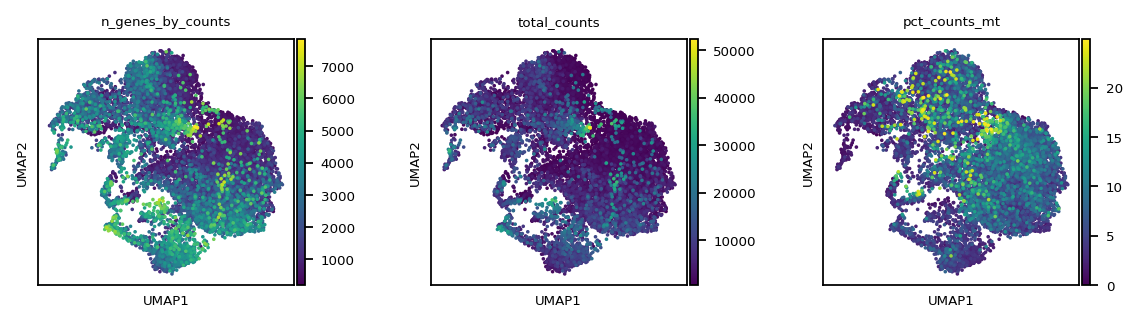

In [8]:
sc.pl.umap(endothelial, color = ['n_genes_by_counts', 'total_counts', "pct_counts_mt"], ncols=3)

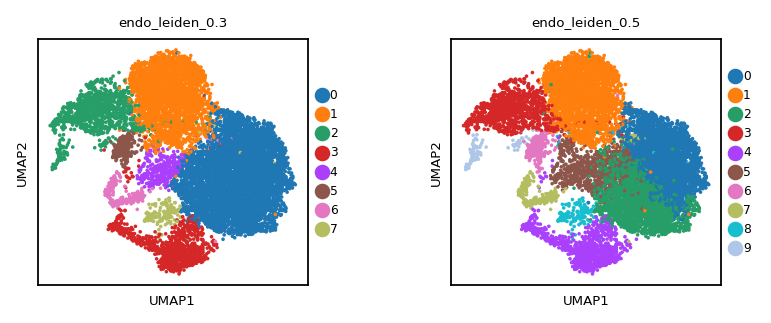

In [9]:
sc.pl.umap(endothelial, color = ["endo_leiden_0.3", "endo_leiden_0.5"])

In [10]:
sc.tl.rank_genes_groups(endothelial, groupby='endo_leiden_0.5', method='wilcoxon', key_added='rank_genes_groups_endo_leiden_0.5')

ranking genes
    finished: added to `.uns['rank_genes_groups_endo_leiden_0.5']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:16)


In [11]:
pd.DataFrame(endothelial.uns['rank_genes_groups_endo_leiden_0.5']["names"]).head(10)

,0,1,2,3,4,5,6,7,8,9
0,mt-Rnr1,Bst2,Fos,Ly6a,Rgs5,Cxcl12,Ndufa4l2,Col3a1,Hbb-bs,Fcer1g
1,mt-Cytb,H2-K1,Btg2,Cxcl9,Ndufa4l2,Rbp7,Rgs5,Dcn,Hba-a1,Tyrobp
2,mt-Rnr2,B2m,Jun,H2-D1,Pdgfrb,Tm4sf1,Colec11,Col1a1,Hba-a2,Plac8
3,Gm42418,H2-D1,Junb,B2m,Tpm2,Slc6a6,Higd1b,Col1a2,Hbb-bt,Cd52
4,mt-Nd1,Ifitm3,Egr1,Gbp2,Abcc9,Cdkn1c,Kcnj8,Postn,Alas2,Cebpb
5,Sparcl1,Iigp1,Aqp1,H2-K1,Cygb,Ltbp4,Postn,Lum,Rgs5,Ifi27l2a
6,Cd34,Isg15,Jund,AW112010,Kcnj8,Glul,Cygb,Fstl1,Snca,Coro1a
7,mt-Nd2,H2-Q7,Klf2,Ubd,Higd1b,Gja4,Aspn,Dpt,Colec11,Lgals3
8,Mest,Xist,Klf4,H2-T23,Gucy1a1,Mgll,Tpm2,Mgp,Mkrn1,Lyz2
9,Tmsb4x,Gbp7,Aplnr,H2-Q7,Colec11,Ptprb,Abcc9,Gsn,Ndufa4l2,S100a6


In [ ]:
# Remove doublet populations or misclustered populations (expressing markers of other cell types)
# Cluster 7 expresses fibroblast markers: Col3a1, Dcn, COl1a1, Col2a1, Postn
# Cluster 4 and 6 expresses mesenchymal endothelial/ mural cell markers: Rgs5, Postn,, Kcnj8, etc 
# Cluster 8 represents erythroblasts 
# CLuster 9 repsents immune cell population

In [12]:
# Selecting endothelial cells
endothelial_only = endothelial[endothelial.obs["endo_leiden_0.5"].isin(["0", "1", "2", "3", "5"])]

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2631: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


Trying to set attribute `.uns` of view, copying.


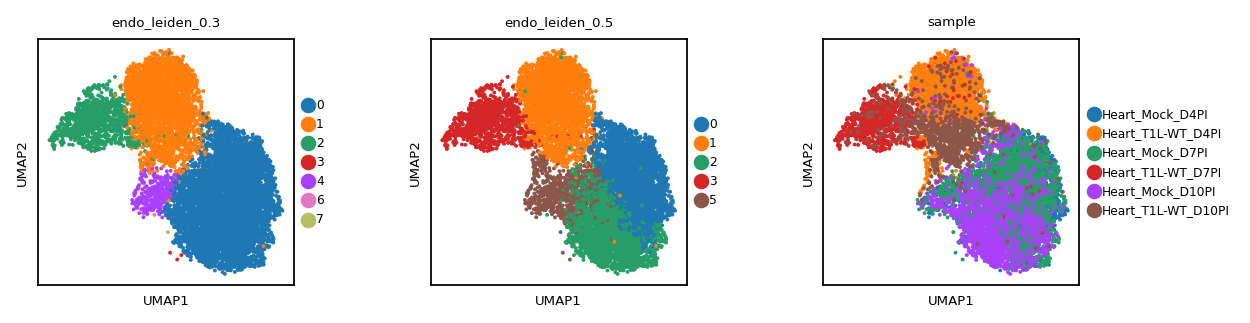

In [13]:
sc.pl.umap(endothelial_only, color = ["endo_leiden_0.3", "endo_leiden_0.5", "sample"])

In [17]:
endothelial_only.obs["cell_phenotypes"] = endothelial_only.obs["endo_leiden_0.5"]
phenotypes = {'0': "Venous ECs", 
                '1': "Inflamed ECs", 
               '2': "Venous ECs",
                '3': "Cxcl9-high ECs",
                '5': "Arterial ECs"}
endothelial_only.obs["cell_phenotypes"] = endothelial_only.obs["cell_phenotypes"].map(phenotypes).astype("category")

In [18]:
sc.tl.rank_genes_groups(endothelial_only, groupby='cell_phenotypes', method='wilcoxon', key_added='rank_genes_groups_cell_phenotypes')

ranking genes
    finished: added to `.uns['rank_genes_groups_cell_phenotypes']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:12)


In [19]:
pd.DataFrame(endothelial_only.uns['rank_genes_groups_cell_phenotypes']["names"]).head(10)

,Arterial ECs,Cxcl9-high ECs,Inflamed ECs,Venous ECs
0,Cxcl12,Ly6a,Bst2,mt-Cytb
1,Tm4sf1,Cxcl9,H2-K1,Aplnr
2,Rbp7,H2-D1,B2m,Aqp1
3,Slc6a6,Gbp2,Isg15,Sparcl1
4,Cdkn1c,B2m,Ifitm3,Marcks
5,Ltbp4,AW112010,Iigp1,Calm1
6,Gja4,H2-K1,H2-D1,mt-Nd4
7,Glul,Ubd,H2-Q7,mt-Nd2
8,Col18a1,H2-T23,Xist,Cd34
9,Ptprb,H2-Q7,Gbp7,mt-Nd1


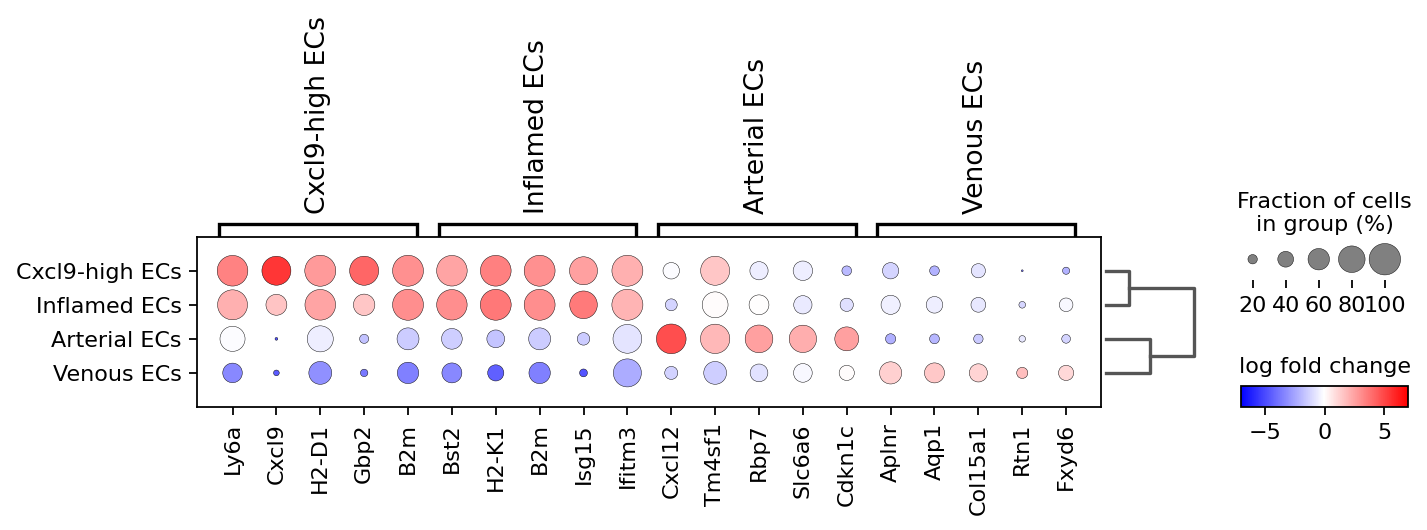

In [22]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=12, frameon=True, figsize=(3, 3), transparent=True, format="pdf")
sc.pl.rank_genes_groups_dotplot(endothelial_only, n_genes=5, key="rank_genes_groups_cell_phenotypes", values_to_plot='logfoldchanges', min_logfoldchange=1.0, vmax=7, vmin=-7, cmap='bwr',)

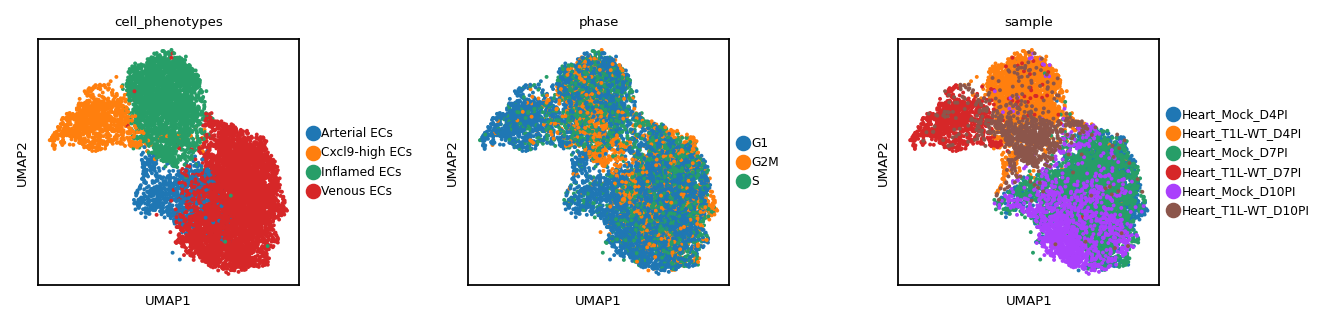

In [23]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, frameon=True, figsize=(2, 2), transparent=True, format="pdf")
sc.pl.umap(endothelial_only, color = ["cell_phenotypes", "phase", "sample" ], wspace=0.5)

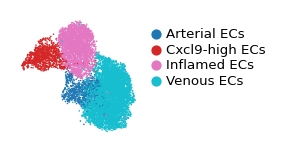

In [44]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(endothelial_only, color = ["cell_phenotypes"], size=2, palette="tab10", title="", show=False, ax = ax, frameon=False)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_endo_celltypes_03.pdf")

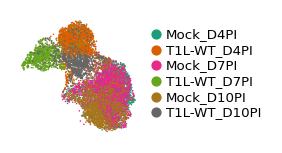

In [26]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=False, figsize=(2.5, 2.5), vector_friendly = False, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize = (1.0, 1.0))
sc.pl.umap(endothelial_only, color = ["condition"], size=2, palette="Dark2", title="", show=False, ax = ax)
plt.legend(ncol=1, prop={'size': 6}, handletextpad=0.5, markerscale = 0.6, frameon = False, labelspacing = 0.2, bbox_to_anchor = (1.0,1.0))
# plt.tight_layout()
plt.savefig("figures/umap_endo_condition.pdf")

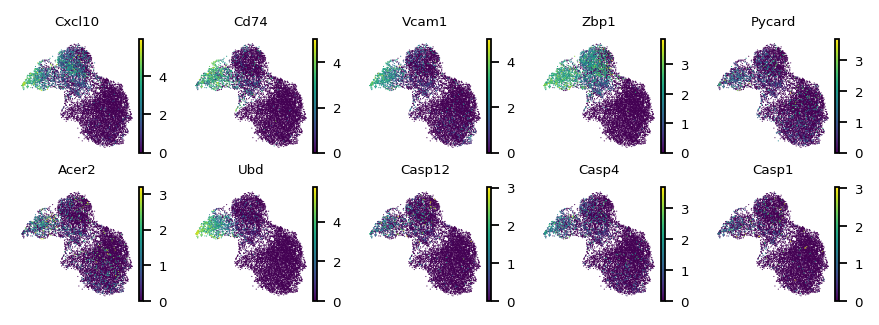

In [52]:
sc.settings.set_figure_params(dpi=80, dpi_save= 300, fontsize=6, facecolor='white', frameon=True, figsize=(1, 1), transparent=True, format="pdf")
sc.pl.umap(endothelial_only, color = ["Cxcl10", "Cd74", "Vcam1", "Zbp1", "Pycard", "Acer2", "Ubd", "Casp12", "Casp4" , "Casp1"], size=1, cmap="viridis", wspace = 0.3, hspace = 0.3, ncols=5, frameon=False, add_outline=False)


In [28]:
# endothelial_only.write_h5ad("./../pyobjs_github/endothelial_only.h5ad")

In [4]:
endothelial_only = sc.read_h5ad("./../pyobjs/endothelial_only.h5ad")

In [45]:
sc.tl.rank_genes_groups(endothelial_only, groupby="cell_phenotypes", groups=["Inflamed ECs"], reference="Venous ECs", key_added="inflamed_endo_markers")
sc.tl.rank_genes_groups(endothelial_only, groupby="cell_phenotypes", groups=["Cxcl9-high ECs"], reference="Inflamed ECs", key_added="Cxcl_high_markers")

ranking genes
    finished: added to `.uns['inflamed_endo_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)
ranking genes
    finished: added to `.uns['Cxcl_high_markers']`
    'names', sorted np.recarray to be indexed by group ids
    'scores', sorted np.recarray to be indexed by group ids
    'logfoldchanges', sorted np.recarray to be indexed by group ids
    'pvals', sorted np.recarray to be indexed by group ids
    'pvals_adj', sorted np.recarray to be indexed by group ids (0:00:00)


In [37]:
inflamed_endo_markers = sc.get.rank_genes_groups_df(endothelial_only, group="Inflamed ECs", key="inflamed_endo_markers")
# inflamed_endo_markers.to_csv("./../../../csvs_github//endothelial_only_inflamed_endo_markers.csv")
print(inflamed_endo_markers)

         names      scores  logfoldchanges          pvals      pvals_adj
0        H2-K1  138.422333        4.878017   0.000000e+00   0.000000e+00
1          B2m  114.888687        3.931496   0.000000e+00   0.000000e+00
2        Iigp1   96.479897        6.133065   0.000000e+00   0.000000e+00
3         Bst2   94.084961        3.818194   0.000000e+00   0.000000e+00
4        H2-D1   90.196388        3.268106   0.000000e+00   0.000000e+00
...        ...         ...             ...            ...            ...
18242     Aqp1  -16.377779       -0.980366   4.286604e-59   6.464270e-57
18243  mt-Cytb  -16.579390       -0.448889   3.460175e-60   5.305698e-58
18244     Rtn1  -16.972885       -1.500843   1.873967e-63   3.053060e-61
18245  Eif2s3y  -22.731171       -6.932646  3.259076e-109  8.146350e-107
18246    Ddx3y  -27.038406       -7.667549  9.255424e-151  2.862436e-148

[18247 rows x 5 columns]


In [47]:
Cxcl9_markers = sc.get.rank_genes_groups_df(endothelial_only, group="Cxcl9-high ECs", key="Cxcl_high_markers")
Cxcl9_markers = Cxcl9_markers.sort_values(by="scores", ascending=False)
# Cxcl9_markers.to_csv("./../../../csvs_github/endothelial_only_Cxcl9_high_markers.csv")
print(Cxcl9_markers)

           names     scores  logfoldchanges          pvals      pvals_adj
0            Ubd  46.319275        6.503425  9.473854e-260  1.728694e-255
1      Serpina3g  40.555798        4.104987  2.476036e-229  1.506008e-225
2          Cxcl9  40.251122        3.484947  6.891949e-246  6.287870e-242
3           Cd74  39.155899        5.172838  3.653608e-214  1.111123e-210
4       Serping1  37.855400        3.619458  1.229333e-213  3.204519e-210
...          ...        ...             ...            ...            ...
18242       Egr1 -20.989817       -2.090557   1.309391e-91   5.973112e-89
18243      Stmn1 -21.257160       -2.083722   1.460930e-93   7.015156e-91
18244        H19 -21.423357       -3.787950   5.543370e-96   2.889996e-93
18245      Ltbp4 -28.056990       -2.388164  1.697245e-153  2.064642e-150
18246       Mest -35.442940       -2.738741  1.115176e-227  5.087154e-224

[18247 rows x 5 columns]


In [49]:
# preparing gene list for GO term analysis
de_results = Cxcl9_markers
de_results = de_results[(de_results["logfoldchanges"] > 1.0) & (de_results["pvals_adj"] < 0.01)]
glist = de_results['names'].squeeze().str.strip().tolist()
print(len(glist))

529


In [50]:
# GO_Biological_Process_2021, KEGG_2019_Mouse, WikiPathways_2019_Mouse
enr_res = gseapy.enrichr(gene_list=glist, 
                     organism='Mouse',
                     gene_sets=['GO_Biological_Process_2021'],
                     description='pathway', 
                     cutoff = 0.01)

Connecting to Enrichr Server to get latest library names
Analysis name: pathway, Enrichr Library: GO_Biological_Process_2021
Save file of enrichment results: Job Id:c8f22962a04a13e1ca08ce2f80c58cb6
Done.



In [51]:
enr_res.results[1:50]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1,GO_Biological_Process_2021,response to cytokine (GO:0034097),25/150,1.880502e-13,2.675955e-10,0,0,7.676984,224.951505,CD274;IFITM1;CD40;CIITA;IFITM2;TNFRSF11A;IL18B...
2,GO_Biological_Process_2021,cellular response to cytokine stimulus (GO:007...,44/482,8.877966e-13,8.422230e-10,0,0,3.942249,109.397549,LAMA5;CDKN1A;CD40;IFITM2;CSF2RB;IL2RG;HIF1A;CX...
3,GO_Biological_Process_2021,regulation of inflammatory response (GO:0050727),27/206,7.479176e-12,5.321433e-09,0,0,5.796746,148.506247,RB1;GRN;SEMA7A;CX3CL1;SBNO2;CASP12;HYAL2;CCL5;...
4,GO_Biological_Process_2021,response to interferon-gamma (GO:0034341),17/80,2.559406e-11,1.456814e-08,0,0,10.228671,249.463578,GBP5;CD74;CD40;CIITA;IFITM1;IFITM2;STAT1;ACOD1...
5,GO_Biological_Process_2021,response to lipopolysaccharide (GO:0032496),23/159,3.568458e-11,1.692638e-08,0,0,6.462233,155.457423,GGT5;CD274;CXCL9;ACOD1;LY96;LDOC1;TNFRSF11A;SM...
6,GO_Biological_Process_2021,positive regulation of inflammatory response (...,16/89,1.362919e-09,5.541241e-07,0,0,8.287751,169.183146,ZBP1;GRN;IL15;OSMR;CX3CL1;IL6;TNIP1;HYAL2;NINJ...
7,GO_Biological_Process_2021,defense response to virus (GO:0051607),19/133,2.268023e-09,8.068490e-07,0,0,6.325817,125.911323,ZBP1;IFITM1;CD40;IFITM2;MLKL;STAT1;MX1;ACOD1;S...
8,GO_Biological_Process_2021,cellular response to interferon-gamma (GO:0071...,18/121,3.093496e-09,9.782320e-07,0,0,6.623677,129.784093,GBP5;CIITA;VCAM1;STAT1;ACOD1;CX3CL1;ICAM1;OAS2...
9,GO_Biological_Process_2021,regulation of defense response (GO:0031347),15/83,4.142935e-09,1.179079e-06,0,0,8.326991,160.726431,ZBP1;GRN;SEMA7A;IL1R1;SAMHD1;SELE;BST1;LACC1;S...
10,GO_Biological_Process_2021,defense response to symbiont (GO:0140546),18/124,4.621278e-09,1.195651e-06,0,0,6.435218,123.508523,ZBP1;IFITM1;CD40;IFITM2;MLKL;STAT1;MX1;ACOD1;S...


In [15]:
enr_res.results[1:50]

,Gene_set,Term,Overlap,P-value,Adjusted P-value,Old P-value,Old Adjusted P-value,Odds Ratio,Combined Score,Genes
1,GO_Biological_Process_2021,response to cytokine (GO:0034097),25/150,3.505682e-13,5.007866e-10,0,0,7.449326,213.640857,CD274;IFITM1;CD40;CIITA;IFITM2;TNFRSF11A;CXCL1...
2,GO_Biological_Process_2021,response to interferon-gamma (GO:0034341),18/80,3.741071e-12,3.562746e-09,0,0,10.704403,281.650504,GBP5;CD74;CD40;CIITA;IFITM1;IFITM2;STAT1;ACOD1...
3,GO_Biological_Process_2021,response to lipopolysaccharide (GO:0032496),24/159,9.432994e-12,6.737516e-09,0,0,6.605470,167.691798,GGT5;CD274;CXCL9;SERPINE1;ACOD1;LDOC1;TNFRSF11...
4,GO_Biological_Process_2021,regulation of inflammatory response (GO:0050727),27/206,1.420281e-11,8.115485e-09,0,0,5.624186,140.478551,RB1;GRN;SEMA7A;SERPINE1;CX3CL1;SBNO2;CASP12;HY...
5,GO_Biological_Process_2021,cellular response to cytokine stimulus (GO:007...,42/482,3.299203e-11,1.570971e-08,0,0,3.615864,87.267987,CDKN1A;CD40;IFITM2;CSF2RB;IL2RG;HIF1A;CX3CL1;I...
6,GO_Biological_Process_2021,cellular response to molecule of bacterial ori...,18/115,2.071611e-09,8.455131e-07,0,0,6.829642,136.558280,CD274;CXCL9;SERPINE1;ACOD1;LDOC1;TNFRSF1B;PYCA...
7,GO_Biological_Process_2021,defense response to virus (GO:0051607),19/133,3.583764e-09,1.279852e-06,0,0,6.140317,119.409846,ZBP1;IFITM1;CD40;IFITM2;MLKL;STAT1;MX1;ACOD1;S...
8,GO_Biological_Process_2021,cellular response to lipopolysaccharide (GO:00...,18/120,4.179545e-09,1.326773e-06,0,0,6.493178,125.273300,CD274;CXCL9;SERPINE1;ACOD1;LDOC1;TNFRSF1B;PYCA...
9,GO_Biological_Process_2021,cellular response to interferon-gamma (GO:0071...,18/121,4.787938e-09,1.367914e-06,0,0,6.429805,123.176851,GBP5;CIITA;VCAM1;STAT1;ACOD1;CX3CL1;ICAM1;OAS2...
10,GO_Biological_Process_2021,regulation of defense response (GO:0031347),15/83,6.035350e-09,1.567545e-06,0,0,8.084621,153.006568,ZBP1;GRN;SEMA7A;IL1R1;SAMHD1;SELE;BST1;LACC1;S...


In [16]:
# These terms might chnage on reruning the code.
# We selected the terms of interest form the significantly enriched GO terms
print(enr_res.results.loc[1,"Term"])
print([x.capitalize() for x in enr_res.results.loc[1,"Genes"].split(";")])
print(enr_res.results.loc[2,"Term"])
print([x.capitalize() for x in enr_res.results.loc[2,"Genes"].split(";")])
print(enr_res.results.loc[7,"Term"])
print([x.capitalize() for x in enr_res.results.loc[7,"Genes"].split(";")])
print(enr_res.results.loc[13,"Term"])
print([x.capitalize() for x in enr_res.results.loc[13,"Genes"].split(";")])
print(enr_res.results.loc[15,"Term"])
print([x.capitalize() for x in enr_res.results.loc[15,"Genes"].split(";")])
print(enr_res.results.loc[18,"Term"])
print([x.capitalize() for x in enr_res.results.loc[18,"Genes"].split(";")])
print(enr_res.results.loc[24,"Term"])
print([x.capitalize() for x in enr_res.results.loc[24,"Genes"].split(";")])
print(enr_res.results.loc[27,"Term"])
print([x.capitalize() for x in enr_res.results.loc[27,"Genes"].split(";")])
print(enr_res.results.loc[29,"Term"])
print([x.capitalize() for x in enr_res.results.loc[29,"Genes"].split(";")])
print(enr_res.results.loc[30,"Term"])
print([x.capitalize() for x in enr_res.results.loc[30,"Genes"].split(";")])
print(enr_res.results.loc[33,"Term"])
print([x.capitalize() for x in enr_res.results.loc[33,"Genes"].split(";")])

response to cytokine (GO:0034097)
['Cd274', 'Ifitm1', 'Cd40', 'Ciita', 'Ifitm2', 'Tnfrsf11a', 'Cxcl16', 'Il18bp', 'Relb', 'Ubd', 'Casp1', 'Timp3', 'Timp1', 'Jak2', 'Ggt5', 'Cd74', 'Ptpn18', 'Il1r1', 'Stat1', 'Mx1', 'Sele', 'Selp', 'Plscr1', 'Adam9', 'Il6st']
response to interferon-gamma (GO:0034341)
['Gbp5', 'Cd74', 'Cd40', 'Ciita', 'Ifitm1', 'Ifitm2', 'Stat1', 'Acod1', 'Cx3cl1', 'Cxcl16', 'Ccl5', 'Ubd', 'Casp1', 'Irf8', 'Ccl2', 'Gbp2', 'Gbp4', 'Tlr2']
defense response to virus (GO:0051607)
['Zbp1', 'Ifitm1', 'Cd40', 'Ifitm2', 'Mlkl', 'Stat1', 'Mx1', 'Acod1', 'Samhd1', 'Pycard', 'Cxcl10', 'Il6', 'Plscr1', 'Oas2', 'Irf1', 'Oas3', 'Ddit4', 'Serinc3', 'Tlr2']
activation of cysteine-type endopeptidase activity involved in apoptotic process (GO:0006919)
['Nod1', 'Ngf', 'Pycard', 'Acer2', 'Casp12', 'Lck', 'Casp4', 'Casp1', 'Tnfsf10', 'Fas', 'Jak2', 'Bid', 'S100a9', 'Xdh']
response to interleukin-1 (GO:0070555)
['Cd40', 'Il1r1', 'Acod1', 'Tnfrsf11a', 'Hif1a', 'Sele', 'Cx3cl1', 'Pycard', 'Mapk

<ipython-input-17-e3a56e362059>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  GO_results["Term"] = [x.split(" (")[0] for x in GO_results["Term"]]


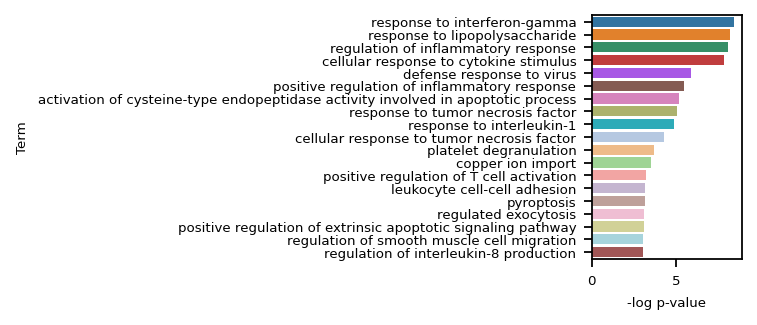

In [17]:
GO_results = enr_res.results
GO_results["-log p-value"] =  -1 * np.log10(GO_results["Adjusted P-value"]) 
GO_results = GO_results.iloc[[1,2,3,4,5,7,12,13,14,15,18,21,23,24,27,29,30,33,34,35],]
GO_results["Term"] = [x.split(" (")[0] for x in GO_results["Term"]]

sc.settings.set_figure_params(dpi_save= 400, fontsize=6, facecolor='white', frameon=True, transparent=True, format="pdf")
fig, ax = plt.subplots(figsize=(1.2,2.0))
plt.rc('font', size=6)
ax.set_axisbelow(True)
plt.grid(b=None)
g = sns.barplot(y = "Term", x = "-log p-value", data= GO_results[1:20], ax=ax)
# ax.set_xticklabels(ax.get_xticklabels(), rotation=90, horizontalalignment='right')
# plt.tight_layout()
plt.show()
# plt.savefig("figures/go_enrich_cxcl9_endo.pdf", facecolor='w', edgecolor='w',
#         orientation='potrait', format="pdf",
#         transparent=True, metadata=None)

In [20]:
heart_infection_visium_no_viral_genes = sc.read_h5ad('./../pyobjs/heart_infection_visium_no_viral_genes.h5ad')

In [21]:
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[1,"Genes"].split(";")], use_raw=True, score_name = 'endo_cytokine_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[7,"Genes"].split(";")], use_raw=True, score_name = 'endo_defense_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[15,"Genes"].split(";")], use_raw=True, score_name = 'endo_il1_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[24,"Genes"].split(";")], use_raw=True, score_name = 'endo_tcellactivation_score')

sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[2,"Genes"].split(";")], use_raw=True, score_name = 'endo_ifng_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[13,"Genes"].split(";")], use_raw=True, score_name = 'endo_endopeptidase_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[18,"Genes"].split(";")], use_raw=True, score_name = 'endo_tnf_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[27,"Genes"].split(";")], use_raw=True, score_name = 'endo_adhesion_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[29,"Genes"].split(";")], use_raw=True, score_name = 'endo_pyroptosis_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[30,"Genes"].split(";")], use_raw=True, score_name = 'endo_exocytosis_activity_score')
sc.tl.score_genes(heart_infection_visium_no_viral_genes, [x.capitalize() for x in enr_res.results.loc[33,"Genes"].split(";")], use_raw=True, score_name = 'endo_apoptosis_activity_score') 

computing score 'endo_cytokine_activity_score'
    finished: added
    'endo_cytokine_activity_score', score of gene set (adata.obs).
    748 total control genes are used. (0:00:00)
computing score 'endo_defense_activity_score'
    finished: added
    'endo_defense_activity_score', score of gene set (adata.obs).
    547 total control genes are used. (0:00:00)
computing score 'endo_il1_activity_score'
    finished: added
    'endo_il1_activity_score', score of gene set (adata.obs).
    500 total control genes are used. (0:00:00)
computing score 'endo_tcellactivation_score'
    finished: added
    'endo_tcellactivation_score', score of gene set (adata.obs).
    450 total control genes are used. (0:00:00)
computing score 'endo_ifng_activity_score'
    finished: added
    'endo_ifng_activity_score', score of gene set (adata.obs).
    598 total control genes are used. (0:00:00)
computing score 'endo_endopeptidase_activity_score'
    finished: added
    'endo_endopeptidase_activity_score', s

/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


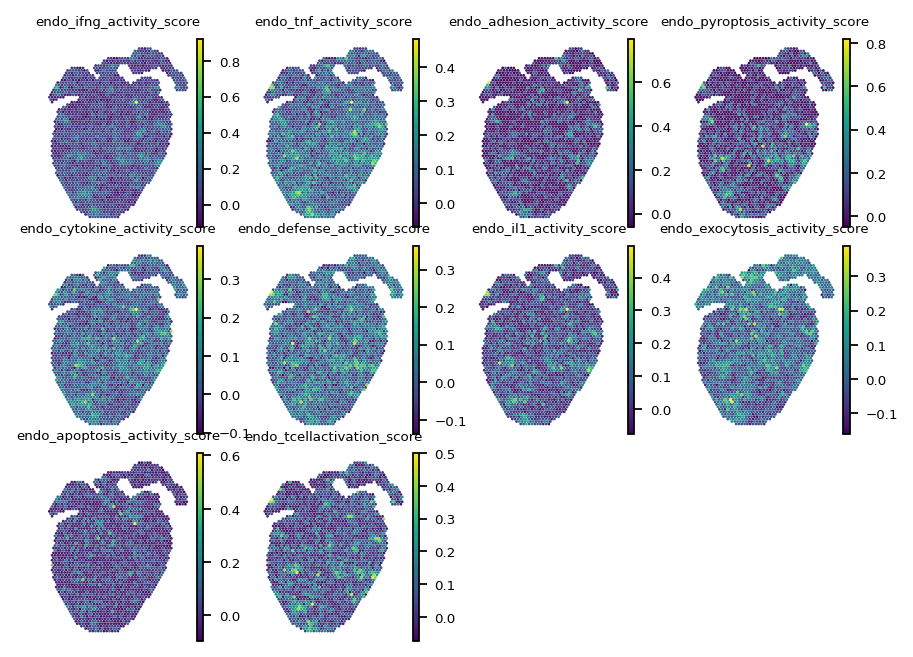

In [22]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(1.5,1.5), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["endo_ifng_activity_score", 'endo_tnf_activity_score', 'endo_adhesion_activity_score', 'endo_pyroptosis_activity_score', "endo_cytokine_activity_score", "endo_defense_activity_score", "endo_il1_activity_score", "endo_exocytosis_activity_score", "endo_apoptosis_activity_score", "endo_tcellactivation_score"], ncols=4, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


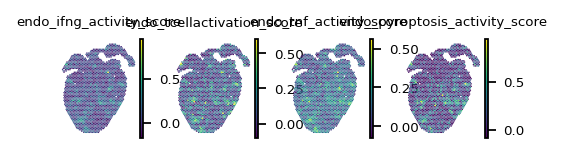

In [379]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.8,0.8), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["endo_ifng_activity_score", "endo_tcellactivation_score", 'endo_tnf_activity_score', 'endo_pyroptosis_activity_score'], 
              ncols=4, frameon=False, cmap="viridis",
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "endo_spatial_module_scores.pdf")

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


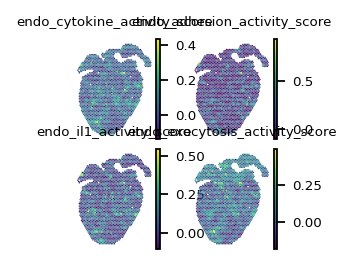

In [349]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.8,0.8), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["endo_cytokine_activity_score", "endo_adhesion_activity_score", "endo_il1_activity_score", "endo_exocytosis_activity_score"], ncols=2, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "endo_supp_spatial_modules.pdf")

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


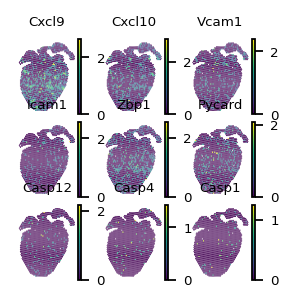

In [380]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize=(0.6,0.6), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["Cxcl9", "Cxcl10", "Vcam1", "Icam1", "Zbp1", "Pycard", "Casp12", "Casp4", "Casp1"], ncols=3, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1, save = "endospatialfeatureplot.pdf")

In [ ]:
sc.settings.set_figure_params(dpi_save= 400, fontsize=7, figsize=(1.5,1.5), facecolor='white', frameon=True, transparent=True, format="pdf")
sc.pl.spatial(heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == 'T1L-Heart-D7PI', :].copy(), color=["endo_ifng_activity_score", 'endo_endopeptidase_activity_score', 'endo_tnf_activity_score', 'endo_adhesion_activity_score', 'endo_pyroptosis_activity_score', 'endo_exocytosis_activity_score', 'endo_apoptosis_activity_score'],
              ncols=1, frameon=False, 
              library_id='T1L-Heart-D7PI', size=1.5, scale_factor=1.0, hspace=0.1, wspace=0.1)

/home/mm2937/miniconda3/envs/python385/lib/python3.8/site-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/home/mm2937/.local/lib/python3.8/site-packages/pandas/core/arrays/categorical.py:2487: FutureWarning: The `inplace` parameter in pandas.Categorical.remove_unused_categories is deprecated and will be removed in a future version.
  res = method(*args, **kwargs)


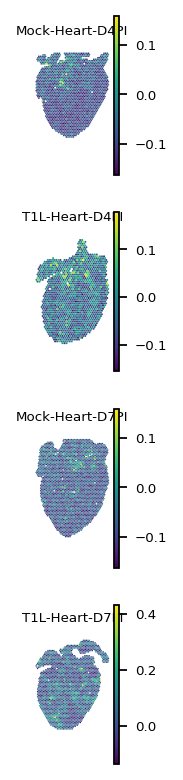

In [313]:
samples = ['Mock-Heart-D4PI', 'T1L-Heart-D4PI', 'Mock-Heart-D7PI', 'T1L-Heart-D7PI']
sc.settings.set_figure_params(dpi_save= 400, fontsize=6, figsize= (2,2.5), facecolor='white', frameon=True, vector_friendly = False, transparent=True, format="pdf")
fig, axs = plt.subplots(4, 1, figsize=(1.0,5))
for i, library in enumerate(samples):
    ad = heart_infection_visium_no_viral_genes[heart_infection_visium_no_viral_genes.obs["sample"] == library, :].copy()
    sc.pl.spatial(
        ad,
        img_key="hires",
        library_id=samples[i],
        color="endo_endopeptidase_activity_score",
        size=1.5,
        scale_factor=1.0,
        show=False, cmap="viridis",
        ax=axs[i],
        frameon=False, title=samples[i]
    )
plt.tight_layout()
plt.savefig("figures/endo_endopeptidase_activity_score.pdf", facecolor='w', edgecolor='w',
        orientation='potrait', format="pdf",
        transparent=True, metadata=None)